In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
transitionMatrix = [[0.1, 0.2, 0.3, 0.4],
                    [0.2, 0.3, 0.1, 0.4],
                    [0.3, 0.1, 0.2, 0.4],
                    [0.1, 0.1, 0.1, 0.7]]
transitionDf = pd.DataFrame(transitionMatrix)
transitionDf

,0,1,2,3
0,0.1,0.2,0.3,0.4
1,0.2,0.3,0.1,0.4
2,0.3,0.1,0.2,0.4
3,0.1,0.1,0.1,0.7


In [34]:
num_steps = 100
starting_state = 0

current_state = starting_state
path = [starting_state]
for step in range(num_steps):
    next_state = np.random.choice(range(4), 1, p = transitionMatrix[current_state])[0]
    path.append(next_state)

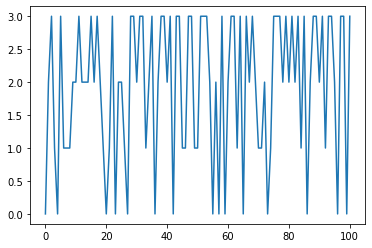

In [36]:
plt.plot(path)

In [ ]:
# Author: Manas Sharma
# Website: www.bragitoff.com
# Email: manassharma07@live.com
# License: MIT
# Value of Pi using Matplotlib animation
 
import numpy as np
import matplotlib
#matplotlib.use("TkAgg") # set the backend (to move the windows to desired location on screen)
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
from matplotlib.pyplot import *
 
fig = figure(figsize=(8, 8), dpi=120)
 
 
# Input parameters
nTrials = int(1E4)
radius = 1
#-------------
# Counter for the pins inside the circle
nInside = 0
# Counter for the pins dropped
nDrops = 0
 
# Generate points in a square of side 2 units, from -1 to 1.
XrandCoords = np.random.default_rng().uniform(-1, 1, (nTrials,))
YrandCoords = np.random.default_rng().uniform(-1, 1, (nTrials,))
 
# First matplotlib window
fig1 = plt.figure(1)
plt.get_current_fig_manager().window.wm_geometry("+00+00") # move the window
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
 
# Second matplotlib window
plt.figure(2)
plt.get_current_fig_manager().window.wm_geometry("+960+00") # move the window
# plt.ylim(2.8,4.3)
 
# Some checks so the legend labels are only drawn once
isFirst1 = True
isFirst2 = True
 
# Some arrays to store the pi value vs the number of pins dropped
piValueI = []
nDrops_arr = []
 
# Some arrays to plot the points
insideX = []
outsideX = []
insideY = []
outsideY = []
 
# Begin Monte Carlo
for i in range(nTrials):
    x = XrandCoords[i]
    y = YrandCoords[i]
    # Increment the counter for number of total pins dropped
    nDrops = nDrops + 1
     
     
    # Check if the points are inside the circle or not
    if x**2+y**2<=radius**2:
        nInside = nInside + 1
        insideX.append(x)
        insideY.append(y)
                
    else:
        outsideX.append(x)
        outsideY.append(y)
         
 
    # plot only at some values
    if i%100==0:
        # Draw on first window
        plt.figure(1)
        # The label is only needed once so 
        if isFirst1:
             
            # Plot once with label
            plt.scatter(insideX,insideY,c='pink',s=50,label='Drop inside')
            isFirst1 = False
            plt.legend(loc=(0.75, 0.9))
        else:
            #Remaining plot without label
           plt.scatter(insideX,insideY,c='pink',s=50)
        # Draw on first window
        plt.figure(1)
        # The label is only needed once so 
        if isFirst2:
            # Plot once with label
            plt.scatter(outsideX,outsideY,c='orange',s=50,label='Drop outside')
            isFirst2 = False
            plt.legend(loc=(0.75, 0.9))
        else:
            #Remaining plot without label
           plt.scatter(outsideX,outsideY,c='orange',s=50)
         
          
        area = 4*nInside/nDrops
        plt.figure(1)
        plt.title('No. of pin drops = '+str(nDrops)+';         No. inside circle = '+str(nInside)+r';         π  ≈ $4\frac{N_\mathrm{inside}}{N_\mathrm{total}}=$ '+str(np.round(area,6)))
        piValueI.append(area)
        nDrops_arr.append(nDrops)
        # For plotting on the second window
        plt.figure(2)
        plt.axhline(y=np.pi, c='darkseagreen',linewidth=2,alpha=0.5)
        plt.plot(nDrops_arr,piValueI,c='mediumorchid')
        plt.title('π estimate vs no. of pin drops')
        plt.annotate('π',[0,np.pi],fontsize=20)
        # The following command is needed to make the second window plot work.
        plt.draw()
        # Pause for animation
        plt.pause(0.1)
             
     
area = 4*nInside/nTrials
print("Final estimated value of Pi: ",area)
 
 